In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declare Global Varialbes
N = 100 # Number of individuals
S = 10 # Number of site
R = 100 # Reproduction rate >= 1
m = 0.02 # Mutation rate
G = 200 # Generation
rec_num = 100

In [3]:
mean_1 = []
minimum_1 = []
maximum_1 = []

# Create Original individuals
indiv = np.random.randint(0, 2, size=(N, S)) * 2 - 1

# Neutral Evolution
for epoch in range(G):
    # Reproducing
    offspring = np.repeat(indiv, np.full(indiv.shape[0], R), axis=0)
    # Mutation
    M = np.random.choice([-1, 1], size=offspring.shape, p=[m, 1 - m])
    offspring *= M
    # Calculate fitness
    fitness = (offspring == 1).sum(axis=1)
    
    # Append historical stats
    mean_1.append(fitness.mean())
    minimum_1.append(fitness.min())
    maximum_1.append(fitness.max())
    
    # Resample individuals from offsprings
    indiv = offspring[np.random.choice(np.arange(len(offspring)), N)]

In [4]:
mean_2 = []
minimum_2 = []
maximum_2 = []

# Create Original individuals
indiv = np.random.randint(0, 2, size=(N, S)) * 2 - 1
# Original fitness
fitness = (indiv == 1).sum(axis=1)

# Natural Selection
for epoch in range(G):
    # Reproducing offsprings
    offspring = np.repeat(indiv, fitness, axis=0)
    # Mutation
    M = np.random.choice([-1, 1], size=offspring.shape, p=[m, 1 - m])
    offspring *= M
    # Calculate fitness
    fitness = (offspring == 1).sum(axis=1)
    
    # Append historical stats
    mean_2.append(fitness.mean())
    maximum_2.append(fitness.max())
    minimum_2.append(fitness.min())
    
    # Resampling
    indiv = offspring[np.random.choice(np.arange(len(offspring)), N)]
    fitness = (indiv == 1).sum(axis=1)

In [5]:
mean_3 = []
minimum_3 = []
maximum_3 = []

# Create Original individuals
indiv = np.random.randint(0, 2, size=(N, S)) * 2 - 1
# Original fitness
fitness = (indiv == 1).sum(axis=1)

# Recombination Function
def Recombination(num):
    for i in range(num):
        # recombination happens between individual A and individual B
        A = np.random.choice(np.arange(N), 2, replace=True)[0]
        B = np.random.choice(np.arange(N), 2, replace=True)[1]
        # compute flip matrix based on recombination position
        rec = np.random.choice(np.arange(1, S+1)) # recombination site
        flip_matrix = indiv[A][rec:] * indiv[B][rec:]
        # Recombination
        indiv[A][rec:] *= flip_matrix
        indiv[B][rec:] *= flip_matrix

# Natural Selection with Mutation & Recombination
for epoch in range(G):
    # Recombination
    Recombination(rec_num)
    # Reproducing offsprings
    offspring = np.repeat(indiv, fitness, axis=0)
    # Mutation
    M = np.random.choice([-1, 1], size=offspring.shape, p=[m, 1 - m])
    offspring *= M
    # Calculate fitness
    fitness = (offspring == 1).sum(axis=1)
    
    # Append historical stats
    mean_3.append(fitness.mean())
    maximum_3.append(fitness.max())
    minimum_3.append(fitness.min())
    
    # Resampling
    indiv = offspring[np.random.choice(np.arange(len(offspring)), N)]
    fitness = (indiv == 1).sum(axis=1)

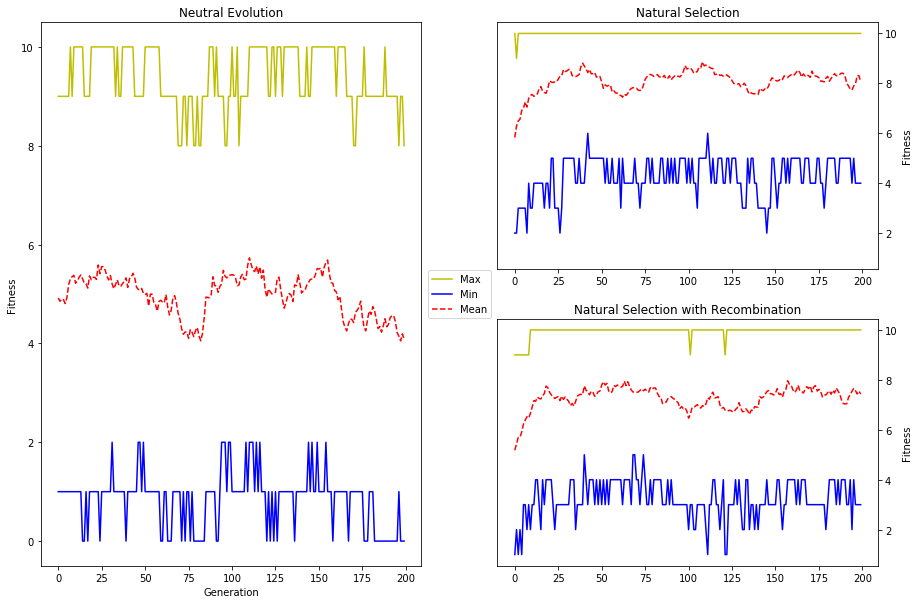

In [6]:
# Visualization
f = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax1.plot(np.arange(G), maximum_1, '-y', label='Max')
ax1.plot(np.arange(G), minimum_1, '-b', label='Min')
ax1.plot(np.arange(G), mean_1, '--r', label='Mean')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.set_title("Neutral Evolution")
ax1.legend(bbox_to_anchor=(1.1, 0.5), loc=10)

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.arange(G), maximum_2, '-y', label='Max')
ax2.plot(np.arange(G), minimum_2, '-b', label='Min')
ax2.plot(np.arange(G), mean_2, '--r', label='Mean')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel("Fitness")
ax2.set_title("Natural Selection")

ax3 = plt.subplot2grid((2, 2), (1, 1), sharey=ax2)
ax3.plot(np.arange(G), maximum_3, '-y', label='Max')
ax3.plot(np.arange(G), minimum_3, '-b', label='Min')
ax3.plot(np.arange(G), mean_3, '--r', label='Mean')
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_ylabel("Fitness")
ax3.set_title("Natural Selection with Recombination")

plt.show()